In [1]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import MobileNetV2, Xception
from tensorflow.keras.models import Model

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping
from tensorflow.keras.regularizers import l2


# utility libraries
import os
import time
import itertools
import random
import numpy as np



# Set random seeds for reproducibility
seed_value = 2025
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_xception.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.2
best_batch_size	= 16
best_epochs	= 15


base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

# global pooling and dropout layers included similar to jute pest architecture
x = BatchNormalization()(base_model.output) # JUST ADDED
x = Dropout(best_dropout)(x) # JUST ADDED
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(best_dropout)(x)
x = BatchNormalization()(x) # JUST ADDED

# final softmax probabilistic classification layer - JUST ADDED L2
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax', kernel_regularizer=l2(0.05))(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)



/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 6102 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Epoch 1/15


/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 116s 599ms/step - accuracy: 0.5630 - loss: 2.3251 - val_accuracy: 0.6545 - val_loss: 1.4931
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 113s 593ms/step - accuracy: 0.8338 - loss: 0.9902 - val_accuracy: 0.7023 - val_loss: 1.1945
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 115s 604ms/step - accuracy: 0.8695 - loss: 0.7642 - val_accuracy: 0.6932 - val_loss: 1.1808
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 116s 610ms/step - accuracy: 0.8775 - loss: 0.7052 - val_accuracy: 0.6818 - val_loss: 1.1648
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 116s 607ms/step - accuracy: 0.8829 - loss: 0.6885 - val_accuracy: 0.7023 - val_loss: 1.1407
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 117s 615ms/step - accuracy: 0.8858 - loss: 0.6884 - val_accuracy: 0.6886 - val_loss: 1.1784
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 117s 615ms/step - accuracy: 0.8833 - loss: 0.6909 - val_accuracy: 0.6909 - val_loss: 1.1549
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 118s 620ms/step - accuracy: 0.8908 - loss: 0.68

# Validation plots

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 562ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.682927,0.700000,0.691358,40.000000
american_house_spider,0.794118,0.675000,0.729730,40.000000
bedbug,0.568627,0.725000,0.637363,40.000000
brown_stink_bug,0.761905,0.800000,0.780488,40.000000
carpenter_ant,0.613636,0.675000,0.642857,40.000000
cellar_spider,0.823529,0.700000,0.756757,40.000000
flea,0.351852,0.475000,0.404255,40.000000
house_centipede,0.897436,0.875000,0.886076,40.000000
silverfish,0.729730,0.675000,0.701299,40.000000
subterranean_termite,0.666667,0.600000,0.631579,40.000000


<Figure size 800x600 with 0 Axes>

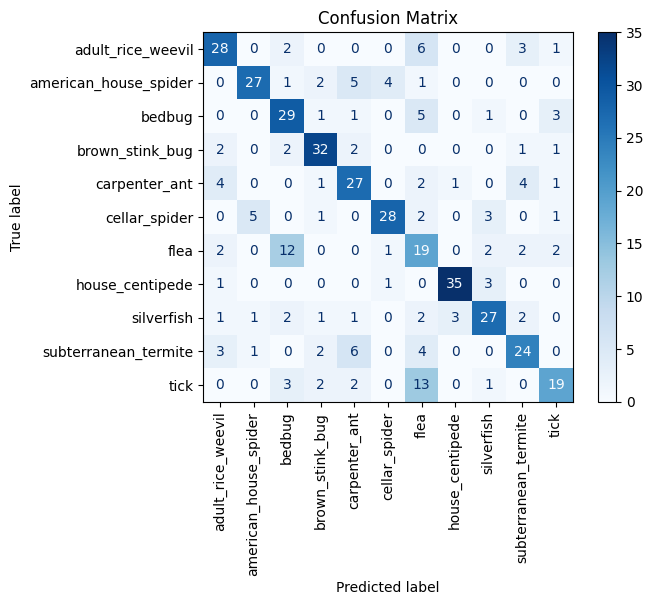

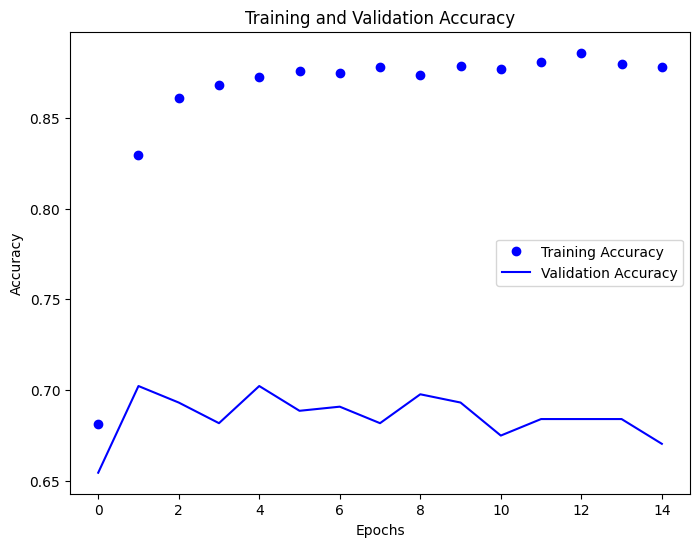

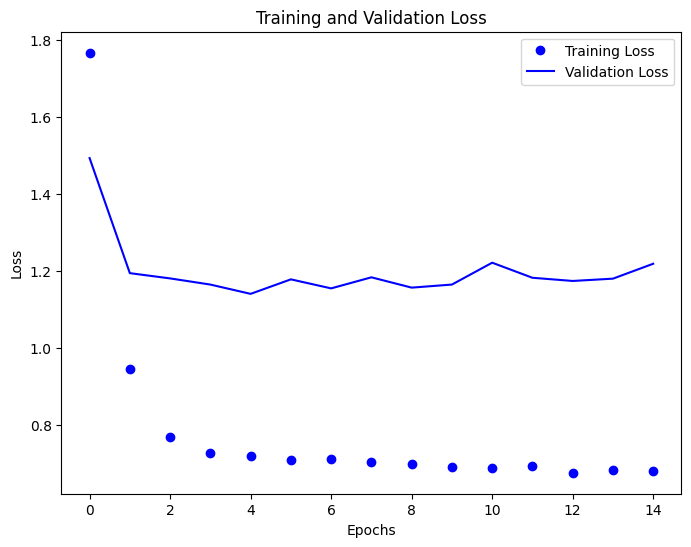

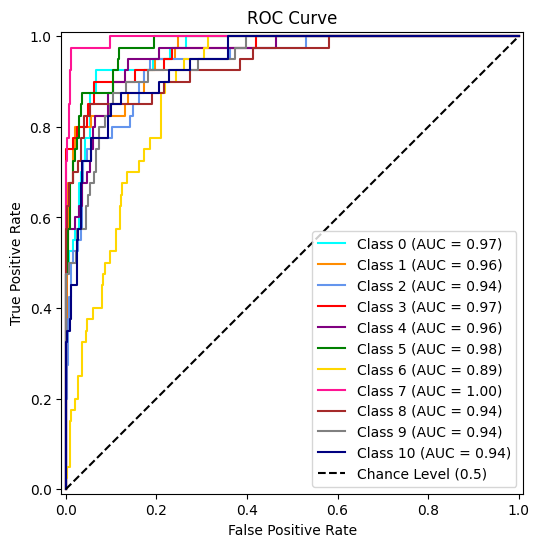

Macro-averaged One-vs-One ROC AUC score: 0.95
Accuracy: 0.670
Precision: 0.688
Recall: 0.67
F1 Score: 0.675


{'accuracy': 0.67,
 'precision': 0.688,
 'recall': 0.67,
 'f1_score': 0.675,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.682927  0.700000  0.691358   40.000000
 american_house_spider   0.794118  0.675000  0.729730   40.000000
 bedbug                  0.568627  0.725000  0.637363   40.000000
 brown_stink_bug         0.761905  0.800000  0.780488   40.000000
 carpenter_ant           0.613636  0.675000  0.642857   40.000000
 cellar_spider           0.823529  0.700000  0.756757   40.000000
 flea                    0.351852  0.475000  0.404255   40.000000
 house_centipede         0.897436  0.875000  0.886076   40.000000
 silverfish              0.729730  0.675000  0.701299   40.000000
 subterranean_termite    0.666667  0.600000  0.631579   40.000000
 tick                    0.678571  0.475000  0.558824   40.000000
 accuracy                0.670455  0.670455  0.670455    0.670455
 macro avg               0.688091  0.

In [2]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics: 'accuracy': 0.67, 'precision': 0.688, 'recall': 0.67, 'f1_score': 0.675

# Test plots

/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.812500,0.65,0.722222,20.0
american_house_spider,0.947368,0.90,0.923077,20.0
bedbug,0.500000,0.55,0.523810,20.0
brown_stink_bug,0.666667,0.70,0.682927,20.0
carpenter_ant,0.652174,0.75,0.697674,20.0
cellar_spider,1.000000,0.85,0.918919,20.0
flea,0.333333,0.55,0.415094,20.0
house_centipede,0.850000,0.85,0.850000,20.0
silverfish,0.866667,0.65,0.742857,20.0
subterranean_termite,0.687500,0.55,0.611111,20.0


<Figure size 800x600 with 0 Axes>

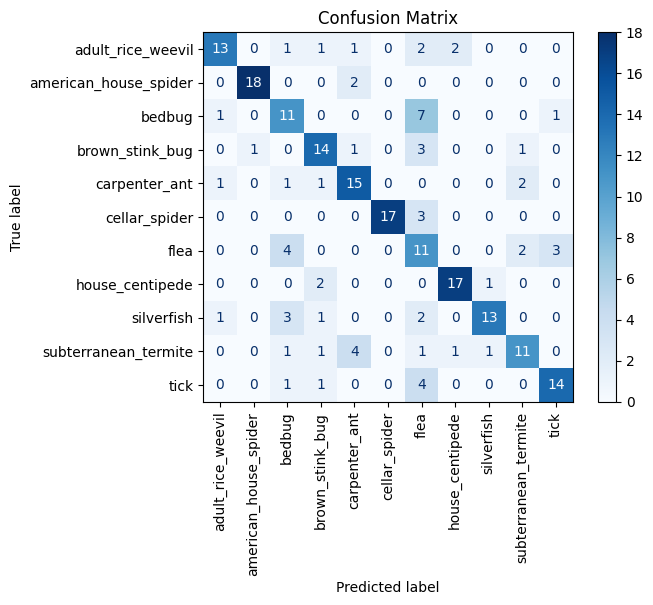

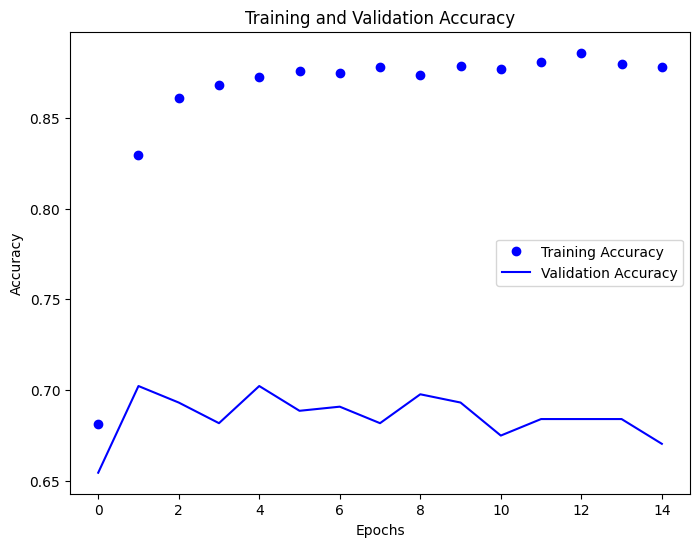

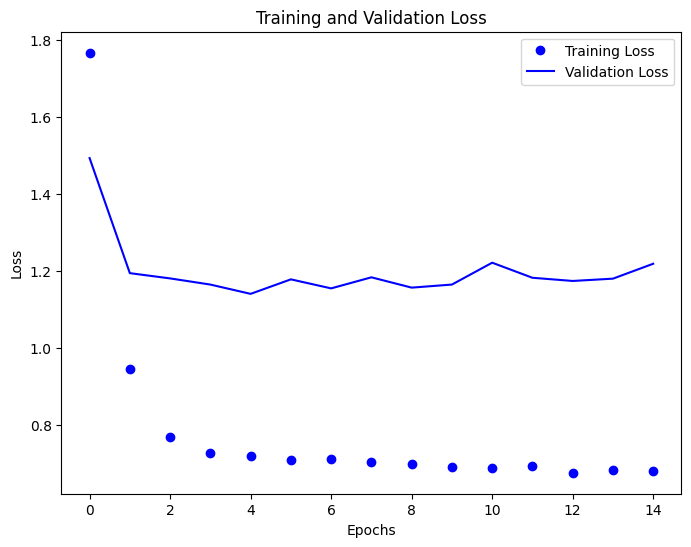

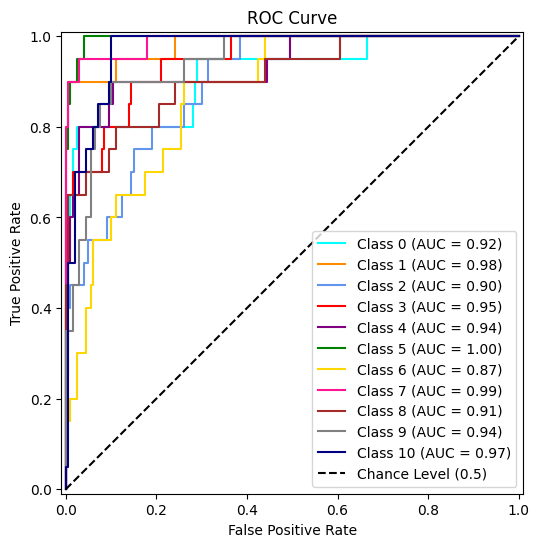

Macro-averaged One-vs-One ROC AUC score: 0.94
Accuracy: 0.700
Precision: 0.736
Recall: 0.7
F1 Score: 0.711


{'accuracy': 0.7,
 'precision': 0.736,
 'recall': 0.7,
 'f1_score': 0.711,
 'classification_report_df':                        precision  recall  f1-score  support
 adult_rice_weevil       0.812500    0.65  0.722222     20.0
 american_house_spider   0.947368    0.90  0.923077     20.0
 bedbug                  0.500000    0.55  0.523810     20.0
 brown_stink_bug         0.666667    0.70  0.682927     20.0
 carpenter_ant           0.652174    0.75  0.697674     20.0
 cellar_spider           1.000000    0.85  0.918919     20.0
 flea                    0.333333    0.55  0.415094     20.0
 house_centipede         0.850000    0.85  0.850000     20.0
 silverfish              0.866667    0.65  0.742857     20.0
 subterranean_termite    0.687500    0.55  0.611111     20.0
 tick                    0.777778    0.70  0.736842     20.0
 accuracy                0.700000    0.70  0.700000      0.7
 macro avg               0.735817    0.70  0.711321    220.0
 weighted avg            0.735817    0.70  

In [3]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics: 'accuracy': 0.7, 'precision': 0.736,'recall': 0.7, 'f1_score': 0.711